# Sheetal Gupta , 11018210053 , CSE- D , Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bd=pd.read_csv("bank.csv",sep=";")
bd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bd.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


# Dropping unwanted columns

In [4]:
bd.drop(["education","contact","day","duration","campaign","pdays","previous","poutcome"],axis=1,inplace=True)
bd.head()

,age,job,marital,default,balance,housing,loan,month,y
0,30,unemployed,married,no,1787,no,no,oct,no
1,33,services,married,no,4789,yes,yes,may,no
2,35,management,single,no,1350,yes,no,apr,no
3,30,management,married,no,1476,yes,yes,jun,no
4,59,blue-collar,married,no,0,yes,no,may,no


In [5]:
bd.age.unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84],
      dtype=int64)

# Checking null values

In [6]:
bd.isnull().sum()

age        0
job        0
marital    0
default    0
balance    0
housing    0
loan       0
month      0
y          0
dtype: int64

In [7]:
bd.shape

(4521, 9)

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
train,test=train_test_split(bd,test_size=0.3)

In [36]:
train["y"] = train["y"].map({"yes":1 ,'no':0})
test["y"] = test["y"].map({"yes":1 ,'no':0})

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


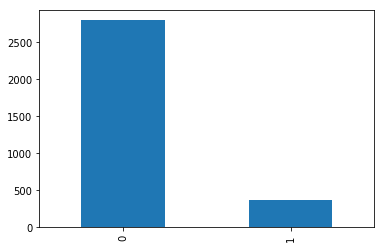

In [37]:
train.y.value_counts().plot(kind='bar')


# the dataset is so much imbalances so we will be using k-fold to dec it a bit by taking the average score of all the folds 

# Checking categorical values 

In [12]:
bd["job"].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [13]:
bd["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [14]:
bd["month"].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

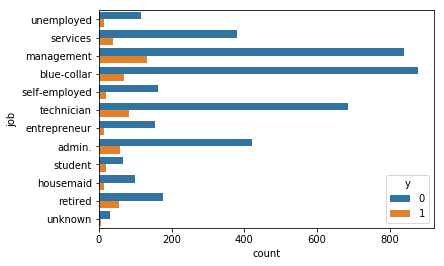

In [15]:
sns.countplot(y="job", data=bd,hue='y')

# Changing categorical values to the numeric values

In [16]:
def fill(frame):
    frame["marital"] = frame["marital"].map({'married':1 ,'single':0, 'divorced':2})
    frame["job"] = frame["job"].map({'unemployed':0, 'services':1, 'management':2, 'blue-collar':3,
       'self-employed':4, 'technician':5, 'entrepreneur':6, 'admin.':7, 'student':8,
       'housemaid':9, 'retired':10, 'unknown':11})
    frame['month']=frame["month"].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
    frame["default"] = frame["default"].map({'yes':1 ,'no':0})
    frame["housing"] = frame["housing"].map({'yes':1 ,'no':0})
    frame["loan"] = frame["loan"].map({'yes':1 ,'no':0})
    return frame
train=fill(train)
test=fill(test)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164 entries, 3972 to 4350
Data columns (total 9 columns):
age        3164 non-null int64
job        3164 non-null int64
marital    3164 non-null int64
default    3164 non-null int64
balance    3164 non-null int64
housing    3164 non-null int64
loan       3164 non-null int64
month      3164 non-null int64
y          3164 non-null object
dtypes: int64(8), object(1)
memory usage: 247.2+ KB


In [32]:
lst = [train]
for column in lst:
    column.loc[column["age"] < 30,  "age_category"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_category"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_category"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_category"] = 50
    column.loc[column["age"] >= 60, "age_category"] = 60
 
train['age_category'] = train['age_category'].astype(np.int64)
train.dtypes

    


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


age              int64
job              int64
marital          int64
default          int64
balance          int64
housing          int64
loan             int64
month            int64
y               object
age_category     int64
dtype: object

In [33]:
lst = [test]
for column in lst:
    column.loc[column["age"] < 30,  "age_category"] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_category"] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), "age_category"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), "age_category"] = 50
    column.loc[column["age"] >= 60, "age_category"] = 60
 
test['age_category'] = test['age_category'].astype(np.int64)
test.dtypes

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


age              int64
job              int64
marital          int64
default          int64
balance          int64
housing          int64
loan             int64
month            int64
y               object
age_category     int64
dtype: object

In [34]:
train.drop('age',axis=1,inplace=True)
test.drop('age',axis=1,inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
train.head()

,job,marital,default,balance,housing,loan,month,y,age_category
3972,4,1,0,2061,1,1,1,0,50
267,5,1,0,-988,1,1,7,0,30
1666,2,1,0,4761,1,0,5,0,30
2457,0,2,0,32,0,0,8,0,50
4258,2,0,0,5980,1,0,5,0,20


# Data Visualization

checking outliers

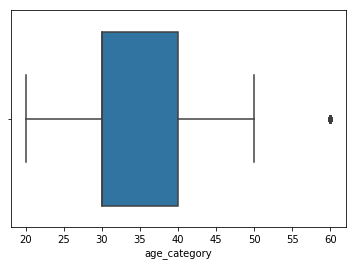

In [67]:
sns.boxplot(train["age_category"])

In [70]:
index3 = train[(train['age_category'] >55)].index
train.drop(index3,axis=0, inplace=True)


C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


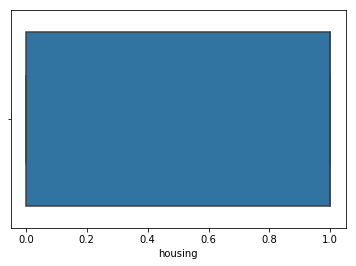

In [71]:
sns.boxplot(train["housing"])


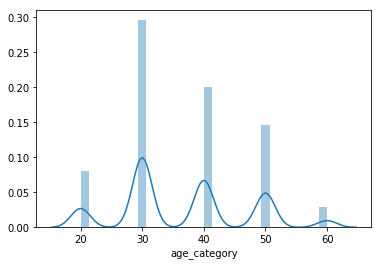

In [43]:
sns.distplot(train['age_category'],kde=True)    #maximum people are of age between 30-40

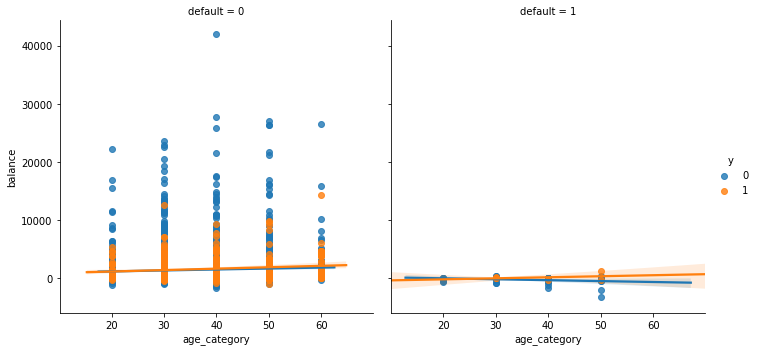

In [44]:
sns.lmplot('age_category', 'balance', data=train,                     #people who are not having default credit are more to do term deposite
           hue='y',
           col='default')                                    

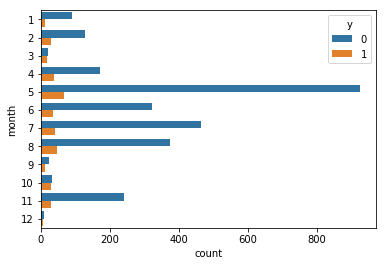

In [45]:
sns.countplot(y="month", data=train,hue='y')  #people have done less td near march becoz it is an ending year month

# modeling

In [47]:
def x_and_y(df):                                                            #dropping the target column from the train set
    not_target = df.drop(["y"], axis = 1)
    target = df["y"]
    return not_target, target

In [49]:
x_train, y_train = x_and_y(train)
x_test, y_test = x_and_y(test)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors=8)

In [82]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [83]:
y_pred=knn.predict(x_test)

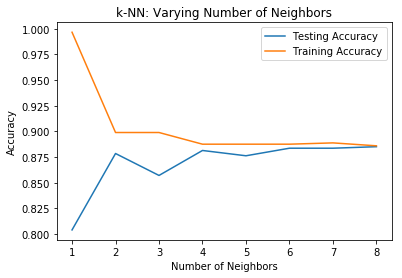

In [84]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(x_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
test_score = accuracy_score(y_test, y_pred)          #test score accuracy
test_score

0.8850405305821666

In [99]:
x_pred=knn.predict(x_train)
train_score = accuracy_score(y_train,x_pred)          #test score accuracy
train_score

0.8859039190897599

In [101]:
from sklearn.metrics import recall_score
test_recall = recall_score(y_test,y_pred)
print(test_f1)

0.8850405305821666